<h2>Linear Regression

<b>Equation 4-1. Linear Regression model prediction

y = θ0 + θ1x1 + θ2x2 + ⋯ + θnxn</b>

    • ŷ is the predicted value.
    • n is the number of features.
    • xi is the ith feature value.
    • θj is the jth model parameter (including the bias term θ0 and the feature
      weights θ1, θ2, ⋯, θn).

<b>Equation 4-2. Linear Regression model prediction (vectorized form)
y = hθ(x) = θ<sub>T</sub> · (x)</b>

   • θ is the model’s parameter vector, containing the bias term θ<sub>0</sub> and the 
    feature weights θ1 to θn.
    
   • θ<sub>T</sub> is the transpose of θ (a row vector instead of a column vector).
   
   • x is the instance’s feature vector, containing x0 to xn, with x0 always equal to 1.
   
   • θ<sub>T</sub> · x is the dot product of  θ<sub>T</sub> and x.
   
   • h<sub>θ</sub> is the hypothesis function, using the model parameters θ.

To train a Linear Regression model, you need to find the value of θ that minimizes
the RMSE.

<b>The Normal Equation</b>

To find the value of θ that minimizes the cost function, there is a closed-form solution
—in other words, a mathematical equation that gives the result directly. This is called
the Normal Equation

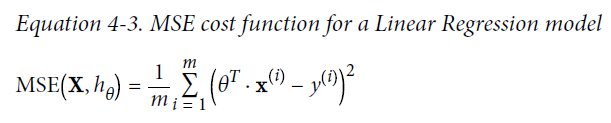
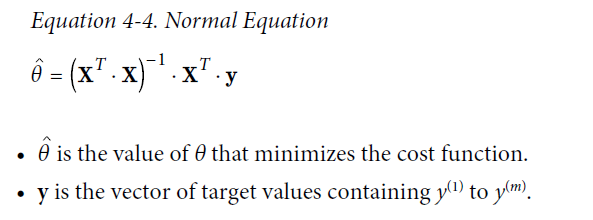

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

X = (3 * np.random.rand(212, 1))
Y = 2 + 2 * X + np.random.randn(212, 1)

X=X.reshape(X.shape[0], )
Y=Y.reshape(X.shape[0], )

X=pd.Series(X)
Y=pd.Series(Y)

<AxesSubplot:>

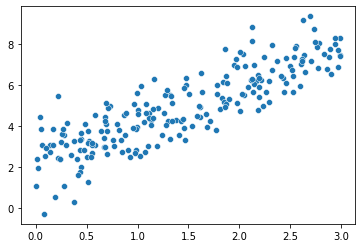

In [2]:
sns.scatterplot(x=X,y=Y)

Now let’s compute θ using the Normal Equation. We will use the inv() function from
NumPy’s Linear Algebra module (np.linalg) to compute the inverse of a matrix, and
the dot() method for matrix multiplication.

The actual function that we used to generate the data is y = 4 + 3x0 + Gaussian noise.We would have hoped for θ0 = 4 and θ1 = 3 but the noise made it impossible to recover the exact parameters of the original
function.


In [3]:
X_b = np.c_[np.ones((212, 1)), X] # add x0 = 1 to each instance

In [4]:
def Noraml_Equation_Compute(X_b,Y):
    return np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(Y)

In [5]:
theta_best = Noraml_Equation_Compute(X_b,Y)

In [6]:
theta_best

array([2.23796592, 1.86220587])

In [7]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([2.23796592, 5.96237766])

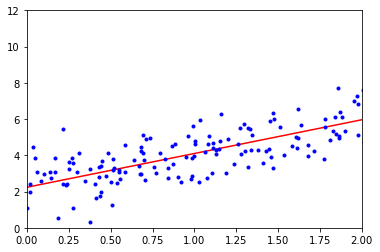

In [8]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, Y, "b.")
plt.axis([0, 2, 0, 12])
plt.show()

In [9]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
X=pd.DataFrame(X)
lin_reg.fit(X, Y)

print(lin_reg.intercept_, lin_reg.coef_)

2.237965924949665 [1.86220587]


In [10]:
lin_reg.predict(X_new)

array([2.23796592, 5.96237766])

Computational Complexity

The Normal Equation computes the inverse of XT · X, which is an n × n matrix
(where n is the number of features). The computational complexity of inverting such a
matrix is typically about O(n2.4) to O(n3) (depending on the implementation). In
other words, if you double the number of features, you multiply the computation
time by roughly 22.4 = 5.3 to 23 = 8.

On the positive side, this equation is linear with regards to the number of instances in
the training set (it is O(m)), so it handles large training sets efficiently, provided they
can fit in memory.

Also, once you have trained your Linear Regression model (using the Normal Equation
or any other algorithm), predictions are very fast: the computational complexity
is linear with regards to both the number of instances you want to make predictions
on and the number of features. In other words, making predictions on twice as many
instances (or twice as many features) will just take roughly twice as much time.

<h2>Gradient Descent</h2>


Gradient Descent is a very generic optimization algorithm capable of finding optimal
solutions to a wide range of problems. The general idea of Gradient Descent is to
tweak parameters iteratively in order to minimize a cost function.

It measures the local gradient of the error function with regards to the
parameter vector θ, and it goes in the direction of descending gradient. Once the gradient
is zero, you have reached a minimum.

Concretely, you start by filling θ with random values (this is called random initialization),
and then you improve it gradually, taking one baby step at a time, each step
attempting to decrease the cost function (e.g., the MSE), until the algorithm converges
to a minimum

An important parameter in Gradient Descent is the size of the steps, determined by
the learning rate hyperparameter. If the learning rate is too small, then the algorithm
will have to go through many iterations to converge, which will take a long time.

On the other hand, if the learning rate is too high, you might jump across the valley
and end up on the other side, possibly even higher up than you were before. This
might make the algorithm diverge, with larger and larger values, failing to find a good
solution

Finally, not all cost functions look like nice regular bowls. There may be holes, ridges,
plateaus, and all sorts of irregular terrains, making convergence to the minimum very
difficult. Figure 4-6 shows the two main challenges with Gradient Descent: if the random
initialization starts the algorithm on the left, then it will converge to a local minimum,
which is not as good as the global minimum. If it starts on the right, then it will
take a very long time to cross the plateau, and if you stop too early you will never
reach the global minimum.

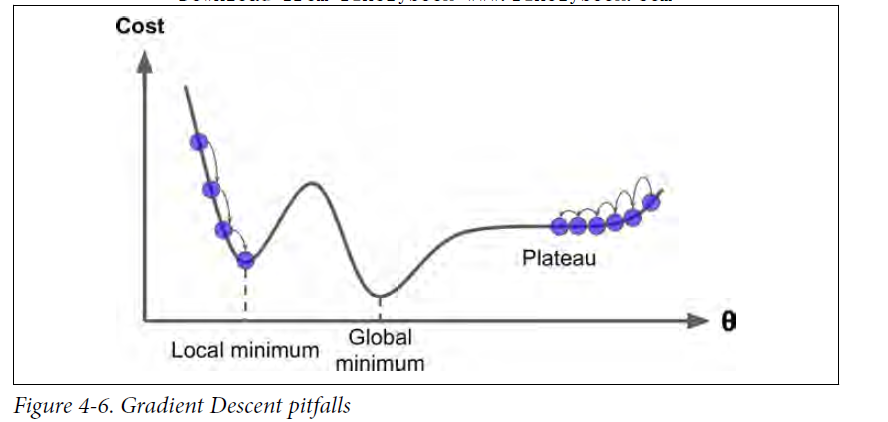

Fortunately, the MSE cost function for a Linear Regression model happens to be a
convex function, which means that if you pick any two points on the curve, the line
segment joining them never crosses the curve. This implies that there are no local
minima, just one global minimum. It is also a continuous function with a slope that
never changes abruptly.4 These two facts have a great consequence: Gradient Descent
is guaranteed to approach arbitrarily close the global minimum (if you wait long
enough and if the learning rate is not too high).

In fact, the cost function has the shape of a bowl, but it can be an elongated bowl if
the features have very different scales. Figure 4-7 shows Gradient Descent on a training
set where features 1 and 2 have the same scale (on the left), and on a training set
where feature 1 has much smaller values than feature 2 (on the right)

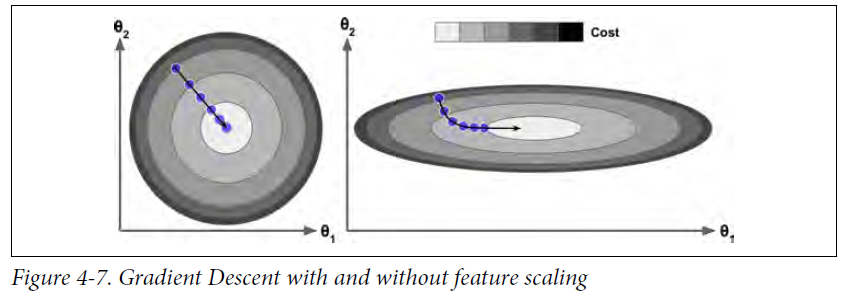

As you can see, on the left the Gradient Descent algorithm goes straight toward the
minimum, thereby reaching it quickly, whereas on the right it first goes in a direction
almost orthogonal to the direction of the global minimum, and it ends with a long
march down an almost flat valley. It will eventually reach the minimum, but it will
take a long time.

When using Gradient Descent, you should ensure that all features
have a similar scale (e.g., using Scikit-Learn’s StandardScaler
class), or else it will take much longer to converge.

This diagram also illustrates the fact that training a model means searching for a
combination of model parameters that minimizes a cost function (over the training
set). It is a search in the model’s parameter space: the more parameters a model has,
the more dimensions this space has, and the harder the search is: searching for a needle
in a 300-dimensional haystack is much trickier than in three dimensions. Fortunately,
since the cost function is convex in the case of Linear Regression, the needle is
simply at the bottom of the bowl.

<h3>Batch Gradient Descent

To implement Gradient Descent, you need to compute the gradient of the cost function
with regards to each model parameter θj. In other words, you need to calculate
how much the cost function will change if you change θj just a little bit. This is called
a partial derivative.

Instead of computing these gradients individually, you can use Equation 4-6 to compute
them all in one go. The gradient vector, noted ∇θMSE(θ), contains all the partial
derivatives of the cost function (one for each model parameter).

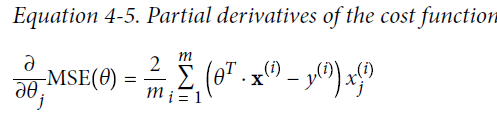

Instead of computing these gradients individually, you can use Equation 4-6 to compute
them all in one go. The gradient vector, noted ∇θMSE(θ), contains all the partial
derivatives of the cost function (one for each model parameter).

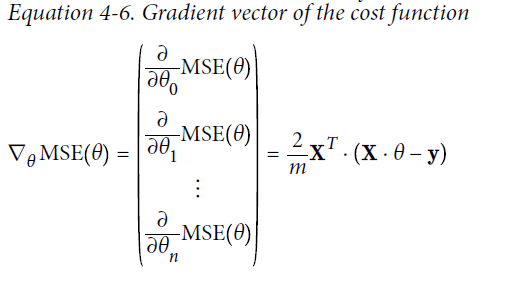

Notice that this formula involves calculations over the full training
set X, at each Gradient Descent step! This is why the algorithm is
called Batch Gradient Descent: it uses the whole batch of training
data at every step. As a result it is terribly slow on very large training
sets (but we will see much faster Gradient Descent algorithms
shortly). However, Gradient Descent scales well with the number of
features; training a Linear Regression model when there are hundreds
of thousands of features is much faster using Gradient
Descent than using the Normal Equation.

Once you have the gradient vector, which points uphill, just go in the opposite direction
to go downhill. This means subtracting ∇θMSE(θ) from θ. This is where the
learning rate η comes into play:6 multiply the gradient vector by η to determine the
size of the downhill step

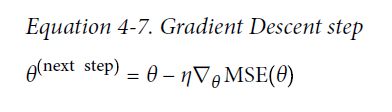

In [20]:
eta = 0.1 # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1) # random initialization
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - Y.to_numpy())
    theta = theta - eta * gradients

theta

array([[5.01800342e+00, 6.43893291e+00, 6.54887798e+00, 8.32763751e+00,
        3.37943737e+00, 6.20503107e+00, 7.51654800e+00, 9.42609349e+00,
        1.16357270e+01, 5.68567316e+00, 3.52670186e+00, 6.33626876e+00,
        9.65669369e+00, 1.01604809e+01, 7.89603563e+00, 1.10942765e+01,
        7.17803460e+00, 7.23422045e+00, 9.34847424e+00, 8.11635603e+00,
        7.22186995e+00, 7.47076449e+00, 9.52040498e+00, 4.25828018e+00,
        7.32541985e+00, 9.70206024e+00, 9.52184416e+00, 6.07302556e+00,
        8.33034112e+00, 4.87370024e+00, 7.28244054e+00, 3.43212201e+00,
        3.60349143e+00, 8.36890767e+00, 7.14157408e+00, 1.01385405e+01,
        9.04933263e+00, 4.51025583e+00, 1.02539306e+01, 7.97317257e+00,
        8.84662479e+00, 7.17168543e+00, 6.87292482e+00, 8.70578921e+00,
        5.89425375e+00, 9.30465738e+00, 1.13923667e+01, 5.71122101e+00,
        9.35653968e+00, 5.90598049e+00, 1.02837643e+01, 7.17631779e+00,
        7.37163429e+00, 2.74495435e+00, 8.60724197e+00, 3.104583

You may wonder how to set the number of iterations. If it is too low, you will still be
far away from the optimal solution when the algorithm stops, but if it is too high, you
will waste time while the model parameters do not change anymore. A simple solution
is to set a very large number of iterations but to interrupt the algorithm when the
gradient vector becomes tiny—that is, when its norm becomes smaller than a tiny
number ϵ (called the tolerance)—because this happens when Gradient Descent has
(almost) reached the minimum.

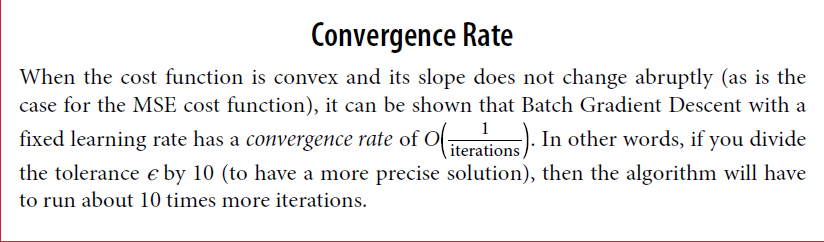

<h3>Stochastic Gradient Descent

The main problem with Batch Gradient Descent is the fact that it uses the whole
training set to compute the gradients at every step, which makes it very slow when
the training set is large. At the opposite extreme, Stochastic Gradient Descent just
picks a random instance in the training set at every step and computes the gradients
based only on that single instance. Obviously this makes the algorithm much faster
since it has very little data to manipulate at every iteration. It also makes it possible to
train on huge training sets, since only one instance needs to be in memory at each
iteration (SGD can be implemented as an out-of-core algorithm.(See Chapter 1))


On the other hand, due to its stochastic (i.e., random) nature, this algorithm is much
less regular than Batch Gradient Descent: instead of gently decreasing until it reaches
the minimum, the cost function will bounce up and down, decreasing only on average.
Over time it will end up very close to the minimum, but once it gets there it will
continue to bounce around, never settling down (see Figure 4-9). So once the algorithm
stops, the final parameter values are good, but not optimal.

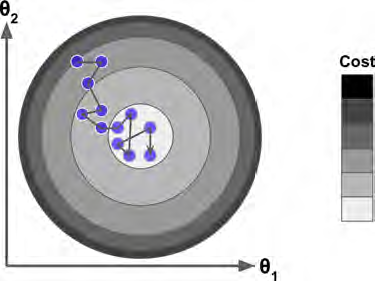

When the cost function is very irregular (as in Figure 4-6), this can actually help the
algorithm jump out of local minima, so Stochastic Gradient Descent has a better
chance of finding the global minimum than Batch Gradient Descent does.

Therefore randomness is good to escape from local optima, but bad because it means
that the algorithm can never settle at the minimum. One solution to this dilemma is
to gradually reduce the learning rate. The steps start out large (which helps make
quick progress and escape local minima), then get smaller and smaller, allowing the
algorithm to settle at the global minimum. This process is called simulated annealing,
because it resembles the process of annealing in metallurgy where molten metal is
slowly cooled down.

The function that determines the learning rate at each iteration
is called the learning schedule. If the learning rate is reduced too quickly, you may get
stuck in a local minimum, or even end up frozen halfway to the minimum. 

If the learning rate is reduced too slowly, you may jump around the minimum for a long
time and end up with a suboptimal solution if you halt training too early.

This code implements Stochastic Gradient Descent using a simple learning schedule:

In [21]:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1) # random initialization
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = Y.to_numpy()[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [22]:
theta

array([[4.06696826],
       [3.10585136]])

Note that since instances are picked randomly, some instances may be picked several
times per epoch while others may not be picked at all. If you want to be sure that the
algorithm goes through every instance at each epoch, another approach is to shuffle
the training set, then go through it instance by instance, then shuffle it again, and so
on. However, this generally converges more slowly.


To perform Linear Regression using SGD with Scikit-Learn, you can use the SGDRe
gressor class, which defaults to optimizing the squared error cost function

<h3>Mini-batch Gradient Descent

The last Gradient Descent algorithm we will look at is called Mini-batch Gradient
Descent. It is quite simple to understand once you know Batch and Stochastic Gradient
Descent:

At each step, instead of computing the gradients based on the full training
set (as in Batch GD) or based on just one instance (as in Stochastic GD), 
Mini- batch GD computes the gradients on small random sets of instances called minibatches.

The main advantage of Mini-batch GD over Stochastic GD is that you can
get a performance boost from hardware optimization of matrix operations, especially
when using GPUs.

The algorithm’s progress in parameter space is less erratic than with SGD, especially
with fairly large mini-batches. As a result, Mini-batch GD will end up walking
around a bit closer to the minimum than SGD. 

But, on the other hand, it may be harder for it to escape from local minima (in the case of problems that suffer from
local minima, unlike Linear Regression as we saw earlier). 

Figure 4-11 shows the paths taken by the three Gradient Descent algorithms in parameter space during
training. They all end up near the minimum, but Batch GD’s path actually stops at the
minimum, while both Stochastic GD and Mini-batch GD continue to walk around.
However, don’t forget that Batch GD takes a lot of time to take each step, and Stochastic
GD and Mini-batch GD would also reach the minimum if you used a good learning
schedule.

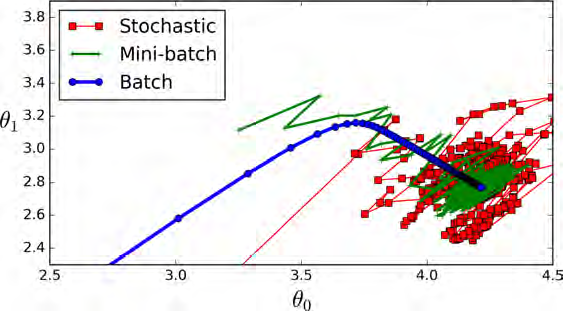

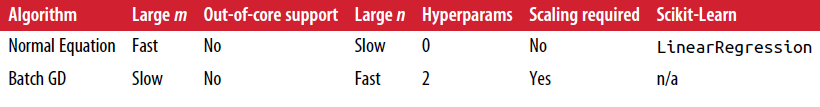
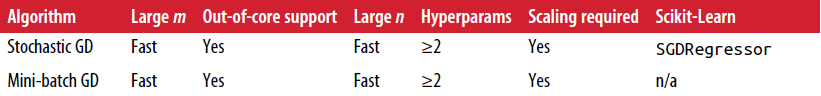